<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/Pending/%E4%BA%88%E6%B8%AC%E4%BD%93%E6%B8%A9%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ある電子体温計のセンサーは8ビットで、5秒に一度測定した体温を、33℃から43.2℃をそれぞれ0〜255の整数値で表す。また、この体温計のMPUは16ビットの正整数(0〜65535)の四則演算の機能しかもたない。

この体温計で体温を測ったところ、センサーの出力は[60, 80, 92, 99, 103]だった。MPUの機能の範囲内で体温を予測せよ。体温の計測値は、正しい値に向かって指数関数的に近付くものとする。

In [ ]:
import numpy as np

t = np.linspace(33.0, 43.2, 256)
t

array([33.  , 33.04, 33.08, 33.12, 33.16, 33.2 , 33.24, 33.28, 33.32,
       33.36, 33.4 , 33.44, 33.48, 33.52, 33.56, 33.6 , 33.64, 33.68,
       33.72, 33.76, 33.8 , 33.84, 33.88, 33.92, 33.96, 34.  , 34.04,
       34.08, 34.12, 34.16, 34.2 , 34.24, 34.28, 34.32, 34.36, 34.4 ,
       34.44, 34.48, 34.52, 34.56, 34.6 , 34.64, 34.68, 34.72, 34.76,
       34.8 , 34.84, 34.88, 34.92, 34.96, 35.  , 35.04, 35.08, 35.12,
       35.16, 35.2 , 35.24, 35.28, 35.32, 35.36, 35.4 , 35.44, 35.48,
       35.52, 35.56, 35.6 , 35.64, 35.68, 35.72, 35.76, 35.8 , 35.84,
       35.88, 35.92, 35.96, 36.  , 36.04, 36.08, 36.12, 36.16, 36.2 ,
       36.24, 36.28, 36.32, 36.36, 36.4 , 36.44, 36.48, 36.52, 36.56,
       36.6 , 36.64, 36.68, 36.72, 36.76, 36.8 , 36.84, 36.88, 36.92,
       36.96, 37.  , 37.04, 37.08, 37.12, 37.16, 37.2 , 37.24, 37.28,
       37.32, 37.36, 37.4 , 37.44, 37.48, 37.52, 37.56, 37.6 , 37.64,
       37.68, 37.72, 37.76, 37.8 , 37.84, 37.88, 37.92, 37.96, 38.  ,
       38.04, 38.08,

In [ ]:
tim = np.arange(0, 5)
tim

array([0, 1, 2, 3, 4])

In [ ]:
T0 = 37.4
temp = T0 - 2.0*np.exp(-tim/2.0)
temp

array([35.4       , 36.18693868, 36.66424112, 36.95373968, 37.12932943])

In [ ]:
itemp = []
for T in temp:
    itemp.append(np.argmin(np.abs(T - t)))
itemp = np.array(itemp)
itemp

array([ 60,  80,  92,  99, 103])

In [ ]:
itemp[1:] - itemp[:-1]

array([20, 12,  7,  4])

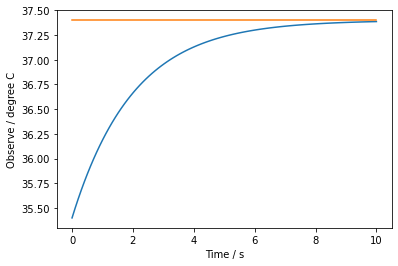

In [ ]:
import matplotlib.pyplot as plt

tim = np.linspace(0,10,100)
temp = T0 - 2.0*np.exp(-tim/2.0)
plt.xlabel("Time / s")
plt.ylabel("Observe / degree C")
plt.plot(tim, temp)
plt.plot(tim, T0*np.ones_like(tim))

In [ ]:
t[335]

37.35